In [1]:
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import transforms
from torchsummary import summary
from tddl.data.sets import DatasetFromSubset
# from tddl.models.wrn import WideResNet

# model = torch.hub.load('pytorch/vision:v0.10.0', 'wide_resnet50_2', pretrained=True)


In [19]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

transform_train = transforms.Compose([
    transforms.RandomCrop(28, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

In [20]:
dataset = datasets.FashionMNIST('/bigdata/f_mnist', train=True, download=True)

In [21]:
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, (50000, 10000), generator=torch.Generator().manual_seed(42))

train_dataset = DatasetFromSubset(
    train_dataset, transform=transform_train,
)

valid_dataset = DatasetFromSubset(
    train_dataset, transform=transform_test,
)

In [24]:
batch_size = 12

In [25]:


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size)

In [26]:

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

In [73]:
dataiter = iter(train_loader)
dataiter_valid = iter(valid_loader)

In [66]:
images, labels = dataiter.next()

In [37]:
img_grid = torchvision.utils.make_grid(images)

In [68]:

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img * 0.3081 + 0.1307     # unnormalize
    if type(img) == torch.Tensor:
        npimg = img.numpy()
    else:
        npimg = img
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

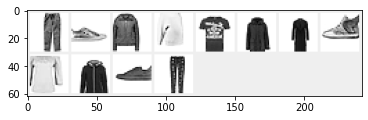

In [72]:
images, labels = dataiter.next()
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

In [20]:
model = torch.load("/home/jetzeschuurman/gitProjects/phd/tddl/artifacts/f_mnist/parn_18_d0.5_256_sgd_l0.1_g0.1/1629473591/cnn_best")

In [3]:
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             576
       BatchNorm2d-2           [-1, 64, 28, 28]             128
       BatchNorm2d-3           [-1, 64, 28, 28]             128
            Conv2d-4           [-1, 64, 28, 28]          36,864
       BatchNorm2d-5           [-1, 64, 28, 28]             128
            Conv2d-6           [-1, 64, 28, 28]          36,864
       PreActBlock-7           [-1, 64, 28, 28]               0
       BatchNorm2d-8           [-1, 64, 28, 28]             128
            Conv2d-9           [-1, 64, 28, 28]          36,864
      BatchNorm2d-10           [-1, 64, 28, 28]             128
           Conv2d-11           [-1, 64, 28, 28]          36,864
      PreActBlock-12           [-1, 64, 28, 28]               0
      BatchNorm2d-13           [-1, 64, 28, 28]             128
           Conv2d-14          [-1, 128,

In [4]:
print(model)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (shortcut): Sequential()
    )
    (1): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1

In [35]:
def ch_dict(mod):
    return {name: mod for name, mod in mod.named_children()}

def gen_rec_child(ch):
    def rec_child(m, ch={}):
        for name, mod in m.named_children():
            check = len(ch_dict(mod)) 
            check is None:
                {}
            {}= blah
        
    return rec_child(ch)


In [ ]:

# def recur(model)
ch = {}
def recur(mod, ch):
    # ch = {}
    for name, module in mod.named_children():
        # ch[name] = module
        print(name)
        ch1 = ch_dict(module)
        print(ch)
        if len(ch1) is None:
            continue
        else:
            ch[name] = ch1
            ch = recur(module, ch1)

        return ch

        # if ch1 is None:
        #     continue
        # for k,v in ch1.items():
        #     ch1[k] = ch_dict(v)



In [37]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_make_layer',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_mod

In [46]:
def print_child(m):
    ch_dict(m)
model.apply(print_child)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (shortcut): Sequential()
    )
    (1): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1

In [44]:
stat_dic = model.state_dict()

for k, v in stat_dic.items():
    if 'conv' in k:
        print(k)

conv1.weight
layer1.0.conv1.weight
layer1.0.conv2.weight
layer1.1.conv1.weight
layer1.1.conv2.weight
layer2.0.conv1.weight
layer2.0.conv2.weight
layer2.1.conv1.weight
layer2.1.conv2.weight
layer3.0.conv1.weight
layer3.0.conv2.weight
layer3.1.conv1.weight
layer3.1.conv2.weight
layer4.0.conv1.weight
layer4.0.conv2.weight
layer4.1.conv1.weight
layer4.1.conv2.weight


In [45]:
model["layer1"][0]["conv1"]

TypeError: 'ResNet' object is not subscriptable

In [12]:
import copy
import tltorch
from tddl.utils.prime_factors import get_prime_factors

# fact_model = copy.deepcopy(model)

layer_nrs = [1]
rank = 0.5
factorization = 'tucker'
decompose_weights = True
td_init = 0.02

for i, (module) in enumerate(model.modules()):
    if i in layer_nrs:
        print(f"{module}")
        # if type(module) == torch.nn.modules.conv.Conv2d:
        #     fact_layer = tltorch.FactorizedConv.from_conv(
        #         module, 
        #         rank=rank, 
        #         decompose_weights=decompose_weights, 
        #         factorization=factorization
        #     )
        # elif type(module) == torch.nn.modules.linear.Linear:
        #     fact_layer = tltorch.FactorizedLinear.from_linear(
        #         module, 
        #         in_tensorized_features=get_prime_factors(module.in_features), 
        #         out_tensorized_features=get_prime_factors(module.out_features), 
        #         rank=rank,
        #         factorization=factorization,
        #     )
        # if td_init:
        #     fact_layer.weight.normal_(0, td_init)
        # fact_model._modules[name] = fact_layer
# print(fact_model)

Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


In [18]:
print(model.conv1)

print(model.layer1[0].conv1)
print(model.layer1[0].conv2)
print(model.layer1[1].conv1)
print(model.layer1[1].conv2)

print(model.layer2[0].conv1)
print(model.layer2[0].conv2)
print(model.layer2[1].conv1)
print(model.layer2[1].conv2)

print(model.layer3[0].conv1)
print(model.layer3[0].conv2)
print(model.layer3[1].conv1)
print(model.layer3[1].conv2)

print(model.layer4[0].conv1)
print(model.layer4[0].conv2)
print(model.layer4[1].conv1)
print(model.layer4[1].conv2)

print(model.linear)

Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), 

TypeError: 'ResNet' object is not subscriptable

In [20]:
[layer for layer in dir(model) if "layer" in layer]

['_make_layer', 'layer1', 'layer2', 'layer3', 'layer4']

In [22]:
layers = ["layer"+str(i) for i in range(1,5)]

In [53]:
iterate = model.children()

conv0 = next(iterate)
c0 = conv0.children()
try:
    print(next(c0))
except:
    print("end of the line")

end of the line


In [57]:
layer = next(iterate)
print(layer)
type(layer) == type(torch.nn.modules)

False

In [66]:
model.modules()
model.children()
model.named_children()
model.named_modules()



<generator object Module.named_children at 0x7f999f05d820>

In [81]:
i = model.named_children()

In [84]:
i = model.named_children()

while True:
    name, layer = next(i)
    print(name)
    # print(layer)
    print("-"*10)
    
    if "layer" in name:
        it = layer.named_children()
        for r in range(2):
            name, layer = next(it)
            print(name)
            print(layer)




conv1
----------
bn1
----------
layer1
----------
0
PreActBlock(
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (shortcut): Sequential()
)
1
PreActBlock(
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (shortcut): Sequential()
)
layer2
----------
0
PreActBlock(
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): Conv2d(64, 128, k

StopIteration: 

In [68]:
next(iteraar)

('conv1',
 Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False))

In [4]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_make_layer',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_mod

In [ ]:
itertools


In [47]:
def get_children(m):
    return {k:v for k,v in m.named_children()}

In [71]:
dic1 = get_children(model)


for k,v in model.named_children():
    dic2 = get_children(v)
    if len(dic2) == 0:
        continue
    else:
        for k2,v2 in v.named_children():
            dic3 = get_children(v2)
            if len(dic3) == 0:
                continue
            dic2[k2] = dic3
        dic1[k] = dic2
    


In [72]:
dic1

{'conv1': Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 'bn1': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 'layer1': {'0': {'bn1': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
   'conv1': Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
   'bn2': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
   'conv2': Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
   'shortcut': Sequential()},
  '1': {'bn1': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
   'conv1': Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
   'bn2': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
   'conv2': Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
   'shortcut': Sequential()}},
 'layer2': {'0

In [75]:
def re(m):
    dic = get_children(m)
    flat = []
    for k,v in model.named_children():
        dic[k] = v
        ch = get_children(v)
        if len(ch):
            

    return dic



In [77]:
for i in []:
    print("shit")

In [85]:
def get_children(model: torch.nn.Module):
    # get children form model!
    children = dict(model.named_children())
    flatt_children = {}
    if children == {}:
        # if model has no children; model is last child! :O
        return model
    else:
       # look for children from children... to the last child!
       for name, child in children.items():
            try:
                flatt_children[name] = get_children(child)
            except TypeError:
                flatt_children[name] = get_children(child)
    return flatt_children

In [86]:
get_children(model)

{'conv1': Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 'bn1': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 'layer1': {'0': {'bn1': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
   'conv1': Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
   'bn2': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
   'conv2': Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
   'shortcut': Sequential()},
  '1': {'bn1': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
   'conv1': Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
   'bn2': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
   'conv2': Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
   'shortcut': Sequential()}},
 'layer2': {'0

In [82]:
dict(model.named_children())

{'conv1': Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 'bn1': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 'layer1': Sequential(
   (0): PreActBlock(
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (shortcut): Sequential()
   )
   (1): PreActBlock(
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1),

In [92]:
def nested_children(m: torch.nn.Module):
    children = dict(m.named_children())
    output = {}
    if children == {}:
        # if module has no children; m is last child! :O
        return m
    else:
       # look for children from children... to the last child!
       for name, child in children.items():
            try:
                output[name] = nested_children(child)
            except TypeError:
                output[name] = nested_children(child)
    return output

In [95]:
nested_children(model)

{'conv1': Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 'bn1': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 'layer1': {'0': {'bn1': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
   'conv1': Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
   'bn2': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
   'conv2': Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
   'shortcut': Sequential()},
  '1': {'bn1': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
   'conv1': Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
   'bn2': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
   'conv2': Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
   'shortcut': Sequential()}},
 'layer2': {'0

In [100]:
conv = out['layer1']['0']['conv1']

In [106]:
import tltorch
conv = tltorch.FactorizedConv.from_conv(
    conv, 
    rank=0.5, 
    decompose_weights=True, 
    factorization='tucker',
)

TypeError: object of type 'numpy.int64' has no len()

In [ ]:
model.layer1[0].conv1

In [107]:
model = torch.load("/home/jetzeschuurman/gitProjects/phd/tddl/artifacts/f_mnist/parn_18_d0.5_256_sgd_l0.1_g0.1/1629473591/cnn_best")
nested = nested_children(model)
conv = nested['layer1']['0']['conv1']

In [108]:
conv

Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [109]:
conv = tltorch.FactorizedConv.from_conv(
    conv, 
    rank=0.5, 
    decompose_weights=True, 
    factorization='tucker',
)

/home/jetzeschuurman/gitProjects/phd/tddl/venv/lib/python3.8/site-packages/tensorly/backend/core.py:885: UserWarning: In partial_svd: converting to NumPy. Check SVD_FUNS for available alternatives if you want to avoid this.
  warnings.warn('In partial_svd: converting to NumPy.'


In [110]:
conv

FactorizedConv(
  in_channels=64, out_channels=64, kernel_size=(3, 3), rank=(49, 49, 2, 2), order=2, padding=[1, 1], bias=False
  (weight): TuckerTensor(shape=(64, 64, 3, 3), rank=(49, 49, 2, 2))
)

In [112]:
model.layer1[0].conv1

Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [145]:
def decompose(m):
    if type(m) == torch.nn.modules.conv.Conv2d:
        m = tltorch.FactorizedConv.from_conv(
            m, 
            rank=0.5, 
            decompose_weights=True, 
            factorization='tucker',
        )
    return m

def d_nested_children(m: torch.nn.Module):
    m = decompose(m)
    children = dict(m.named_children())
    output = {}
    if children == {}:
        # if module has no children; m is last child! :O
        return m
    else:
       # look for children from children... to the last child!
       for name, child in children.items():
            try:
                output[name] = d_nested_children(child)
            except TypeError:
                output[name] = d_nested_children(child)
    return output

In [146]:
d_nested_children(model)

KeyboardInterrupt: 

In [131]:
type(model.conv1)

torch.nn.modules.conv.Conv2d

In [121]:
type(model.conv1) == torch.nn.modules.conv.Conv2d

True

In [136]:
model._modules['layer1']._modules['0']._modules['conv1']

Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [137]:
conv = model._modules['layer1']._modules['0']._modules['conv1']

In [139]:
conv2 = model._modules['layer2']._modules['0']._modules['conv1']

In [140]:
conv2

Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

In [141]:
conv

Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [142]:
conv = conv2

In [143]:
model._modules['layer1']._modules['0']._modules['conv1']

Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [151]:
def lr(m):
    for name, mod in m.named_children():
        if type(mod) == torch.nn.modules.conv.Conv2d:
            mod = tltorch.FactorizedConv.from_conv(
                mod, 
                rank=0.5, 
                decompose_weights=True, 
                factorization='tucker',
            )
            m._modules[name] = mod

In [164]:
def outer(layers):
    def lr(m):
        # i = 0
        for name, mod in m.named_children():
            if type(mod) == torch.nn.modules.conv.Conv2d:
                if name in layers:
                    mod = tltorch.FactorizedConv.from_conv(
                        mod, 
                        rank=0.5, 
                        decompose_weights=True, 
                        factorization='tucker',
                    )
                    m._modules[name] = mod
                # i += 1
    return lr

model = torch.load("/home/jetzeschuurman/gitProjects/phd/tddl/artifacts/f_mnist/parn_18_d0.5_256_sgd_l0.1_g0.1/1629473591/cnn_best")
model.apply(outer(['conv1']))

ResNet(
  (conv1): FactorizedConv(
    in_channels=1, out_channels=64, kernel_size=(3, 3), rank=(4, 1, 1, 1), order=2, padding=[1, 1], bias=False
    (weight): TuckerTensor(shape=(64, 1, 3, 3), rank=(4, 1, 1, 1))
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): FactorizedConv(
        in_channels=64, out_channels=64, kernel_size=(3, 3), rank=(49, 49, 2, 2), order=2, padding=[1, 1], bias=False
        (weight): TuckerTensor(shape=(64, 64, 3, 3), rank=(49, 49, 2, 2))
      )
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (shortcut): Sequential()
    )
    (1): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [ ]:
model = torch.load("/home/jetzeschuurman/gitProjects/phd/tddl/artifacts/f_mnist/parn_18_d0.5_256_sgd_l0.1_g0.1/1629473591/cnn_best")
model.apply(lr)

/home/jetzeschuurman/gitProjects/phd/tddl/venv/lib/python3.8/site-packages/tensorly/backend/core.py:885: UserWarning: In partial_svd: converting to NumPy. Check SVD_FUNS for available alternatives if you want to avoid this.
  warnings.warn('In partial_svd: converting to NumPy.'


ResNet(
  (conv1): FactorizedConv(
    in_channels=1, out_channels=64, kernel_size=(3, 3), rank=(4, 1, 1, 1), order=2, padding=[1, 1], bias=False
    (weight): TuckerTensor(shape=(64, 1, 3, 3), rank=(4, 1, 1, 1))
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): FactorizedConv(
        in_channels=64, out_channels=64, kernel_size=(3, 3), rank=(49, 49, 2, 2), order=2, padding=[1, 1], bias=False
        (weight): TuckerTensor(shape=(64, 64, 3, 3), rank=(49, 49, 2, 2))
      )
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): FactorizedConv(
        in_channels=64, out_channels=64, kernel_size=(3, 3), rank=(49, 49, 2, 2), order=2, padding=[1, 1], bias=False
        (weight): TuckerTensor(shape=(64, 64, 3, 3), rank=(49, 49, 2, 2))
      )


In [171]:
def outer(layers):
    i = 0
    def lr(m):
        nonlocal i
        for l, (name, mod) in enumerate(m.named_children()):
            print(l)
            if type(mod) == torch.nn.modules.conv.Conv2d:
                if i in layers:
                    print('lr')
                    mod = tltorch.FactorizedConv.from_conv(
                        mod, 
                        rank=0.5, 
                        decompose_weights=True, 
                        factorization='tucker',
                    )
                    m._modules[name] = mod
                i+=1
    return lr

model = torch.load("/home/jetzeschuurman/gitProjects/phd/tddl/artifacts/f_mnist/parn_18_d0.5_256_sgd_l0.1_g0.1/1629473591/cnn_best")
model.apply(outer([1]))

SyntaxError: no binding for nonlocal 'i' found (<ipython-input-171-70ee9956981c>, line 2)